In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import glob

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
data_type = "train"
# month = "07"
# category = "잔액정보"

# local
root_path = '../data/open'

# colab
# root_path = '/content/drive/MyDrive/12조 파이널프로젝트/data'

drive_folder = f'{root_path}/{data_type}/5.잔액정보/'

In [3]:
# 소숫점 잘 보이게
pd.options.display.float_format = '{:.5f}'.format

In [7]:
# 잔액정보 (모든 월 통합) 통합 parquet
balance = pd.read_parquet(f'{drive_folder}train_잔액정보_통합_전처리1.parquet')
balance

,기준년월,ID,잔액_일시불_B0M,잔액_할부_B0M,잔액_현금서비스_B0M,잔액_리볼빙일시불이월_B0M,잔액_리볼빙CA이월_B0M,잔액_카드론_B0M,월중평잔_일시불_B0M,월중평잔_할부_B0M,...,평잔_일시불_해외_6M,평잔_RV일시불_6M,평잔_RV일시불_해외_6M,평잔_할부_6M,평잔_할부_해외_6M,평잔_CA_6M,평잔_CA_해외_6M,평잔_카드론_6M,연체정보_유무,Segment
0,201807,TRAIN_000000,998,962,22971,0,0,0,1084,547,...,0,0,0,572,0,17008,0,0,1,D
1,201807,TRAIN_000001,2565,2390,0,0,0,0,4090,2553,...,0,2830,0,2736,0,0,0,0,1,E
2,201807,TRAIN_000002,5312,5113,21531,6795,0,0,5006,8778,...,0,8870,0,4429,0,43351,0,0,1,C
3,201807,TRAIN_000003,730,5025,26284,0,0,0,487,5607,...,0,0,0,5097,0,30697,0,0,0,D
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2399996,201812,TRAIN_399996,3351,0,0,0,0,27337,4412,0,...,0,0,0,0,0,0,0,23031,0,D
2399997,201812,TRAIN_399997,2524,2960,0,0,0,0,2694,3374,...,0,0,0,3995,0,0,0,0,0,C
2399998,201812,TRAIN_399998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E


In [205]:
# 출력 옵션 조정 (생략 없이 dtypes 포함 모든 열 보기)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')

In [5]:
balance.nunique().sort_values()

연체정보_유무                 2
매각잔액_B1M                2
최종연체회차                  2
연체일수_최근                 2
연체일수_B2M                2
연체일수_B1M                2
Segment                 5
기준년월                    6
연체잔액_대환론_B0M            7
연체잔액_RV일시불_B0M         55
연체잔액_카드론_B0M           85
평잔_CA_해외_3M           103
평잔_CA_해외_6M           197
연체잔액_현금서비스_B0M        251
잔액_할부_해외_B0M          349
평잔_RV일시불_해외_6M        618
평잔_할부_해외_6M           626
평잔_할부_해외_3M           715
평잔_RV일시불_해외_3M        725
연체잔액_CA_B0M           788
잔액_리볼빙CA이월_B0M        799
연체잔액_할부_B0M           829
연체잔액_일시불_B0M          885
평잔_일시불_해외_3M         1458
평잔_일시불_해외_6M         1719
연체잔액_B0M             2178
연체원금_최근              4341
연체원금_B1M             6221
연체원금_B2M             6652
잔액_할부_유이자_B0M       14101
잔액_리볼빙일시불이월_B0M     16808
잔액_할부_무이자_B0M       24298
RV_평균잔액_R3M         25309
RV_최대잔액_R3M         26204
잔액_할부_B0M           27079
RV_평균잔액_R6M         27326
RV_최대잔액_R6M         29704
잔액_현금서비스_B0M        29834
RV_평균잔액_R12M

### 최종연체회차

In [15]:
balance['최종연체회차'].value_counts()

최종연체회차
-99    1598239
 0      801761
Name: count, dtype: int64

In [19]:
balance.drop(columns=['최종연체회차'], inplace=True)

- 최종연체회차 > -99 : 정보가 없음 / 0 : 연체가 없음
- 연체정보_유무 라는 변수를 -99 : 0 / 0 : 1 로 판단하고 생성
- 문제점 : 연체 정보가 없는데 연체가 없다고 판단해도 되는가? > 일단 진행 및 상의
- 최종연체회차를 기준으로 연체정보_유무 파생변수 생성했으므로 삭제
- 연체정보는 모르지만 잔액이 나와있으니 ,, 연체 한 사람이 있을수도 있겠네
- 연체정보 없음(-99)인데 연체잔액이 있는 사람 수: 2443
- 연체정보 없음(-99)인데 연체잔액이 없는 사람 수: 1595796
- 삭제할게 아니라, 이제 있는 사람과 없는 사람으로 나눌 수 있어졌다. -> 나중에 정리할때 삭제말고 대체

### 매각잔액_B1M

In [23]:
balance['매각잔액_B1M'].value_counts()

매각잔액_B1M
0        2399999
46708          1
Name: count, dtype: int64

In [25]:
balance.drop(columns=['매각잔액_B1M'], inplace=True)

- 매각잔액_B1M을 봤을 때, 이진 변수로 바꾸더라도 효과가 없어보임
- 매각잔액이 1명만 있어서 불균형. 삭제로 판단.
- 근데 매각이 뭐지..
- Segment가 뭘까? A,B면 살펴볼만하다. -> E임
- test데이터엔 어떻게 되어있나?

### 연체일수_*

In [111]:
balance['연체일수_B1M'].value_counts()

연체일수_B1M
0    2398938
1       1062
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

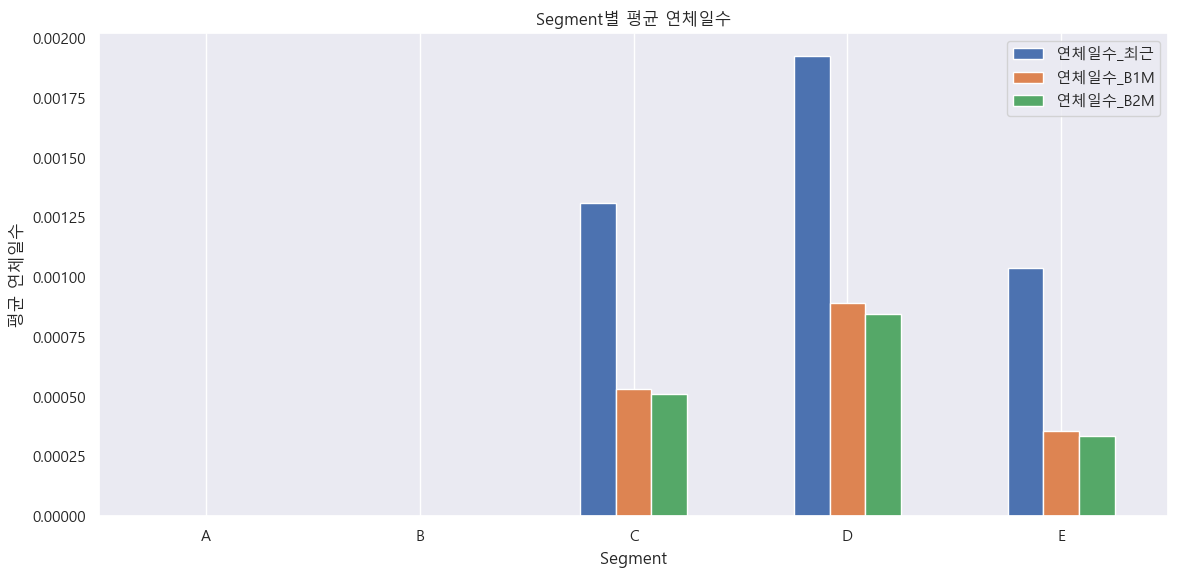

In [43]:
# Segment별 평균 연체일수 구하기
plot_data = balance.groupby('Segment')[['연체일수_최근', '연체일수_B1M', '연체일수_B2M']].mean().reset_index()

# 시각화 (막대그래프)
plt.figure(figsize=(10, 6))
plot_data.set_index('Segment').plot(kind='bar')

plt.title('Segment별 평균 연체일수')
plt.ylabel('평균 연체일수')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 연체잔액_대환론_B0M

In [45]:
balance['연체잔액_대환론_B0M'].value_counts()

연체잔액_대환론_B0M
0        2399994
27479          1
27348          1
27752          1
27018          1
27108          1
27663          1
Name: count, dtype: int64

In [50]:
# 연체잔액_대환론_B0M 값이 0이 아닌 고객 추출
target_users = balance[balance['연체잔액_대환론_B0M'] != 0]

# 그 중 연체일수 3개 중 하나라도 > 0인 사람 수
overdue_count = (
    (target_users['연체일수_최근'] > 0) |
    (target_users['연체일수_B1M'] > 0) |
    (target_users['연체일수_B2M'] > 0)
).sum()

# 전체 해당 고객 수
total_count = len(target_users)

# 연체율 계산
overdue_ratio = overdue_count / total_count

print(overdue_count, total_count, overdue_ratio)

0 6 0.0


In [52]:
balance.drop(columns=['연체잔액_대환론_B0M'], inplace=True)

- 연체잔액_대환론_B0M을 살펴봤을 때, 6명만 존재한다.
- 불균형이 있다고 생각해 삭제 판단.
- 같은 사람인지 한번 확인 필요 > 2개는 같은 사람, 나머진 다른 사람
- Segment도 한번 확인 해봐야할거같음 > 다 E로 나옴 > 그대로 삭제 진행

In [55]:
# 모든 컬럼명 리스트 출력
balance.columns.tolist()

['기준년월',
 'ID',
 '잔액_일시불_B0M',
 '잔액_할부_B0M',
 '잔액_현금서비스_B0M',
 '잔액_리볼빙일시불이월_B0M',
 '잔액_리볼빙CA이월_B0M',
 '잔액_카드론_B0M',
 '월중평잔_일시불_B0M',
 '월중평잔_할부_B0M',
 '월중평잔_CA_B0M',
 '연체잔액_B0M',
 '연체잔액_일시불_B0M',
 '연체잔액_할부_B0M',
 '연체잔액_현금서비스_B0M',
 '연체잔액_카드론_B0M',
 '잔액_현금서비스_B1M',
 '잔액_현금서비스_B2M',
 '잔액_카드론_B1M',
 '잔액_카드론_B2M',
 '잔액_카드론_B3M',
 '잔액_카드론_B4M',
 '잔액_카드론_B5M',
 '잔액_할부_B1M',
 '잔액_할부_B2M',
 '잔액_일시불_B1M',
 '잔액_일시불_B2M',
 '연체일수_B1M',
 '연체일수_B2M',
 '연체원금_B1M',
 '연체원금_B2M',
 '연체일수_최근',
 '연체원금_최근',
 'RV_평균잔액_R12M',
 'RV_최대잔액_R12M',
 'RV_평균잔액_R6M',
 'RV_최대잔액_R6M',
 'RV_평균잔액_R3M',
 'RV_최대잔액_R3M',
 '잔액_할부_유이자_B0M',
 '잔액_할부_무이자_B0M',
 '잔액_할부_해외_B0M',
 '연체잔액_RV일시불_B0M',
 '연체잔액_CA_B0M',
 '월중평잔',
 '월중평잔_일시불',
 '월중평잔_RV일시불',
 '월중평잔_할부',
 '월중평잔_CA',
 '월중평잔_카드론',
 '평잔_3M',
 '평잔_일시불_3M',
 '평잔_일시불_해외_3M',
 '평잔_RV일시불_3M',
 '평잔_RV일시불_해외_3M',
 '평잔_할부_3M',
 '평잔_할부_해외_3M',
 '평잔_CA_3M',
 '평잔_CA_해외_3M',
 '평잔_카드론_3M',
 '평잔_6M',
 '평잔_일시불_6M',
 '평잔_일시불_해외_6M',
 '평잔_RV일시불_6M',
 '평잔_RV일시불_해외_6M',
 '평잔_할부_6M',
 '평잔_할부_해외_6M

## 중복/유사 변수/시계열 확인

### 잔액

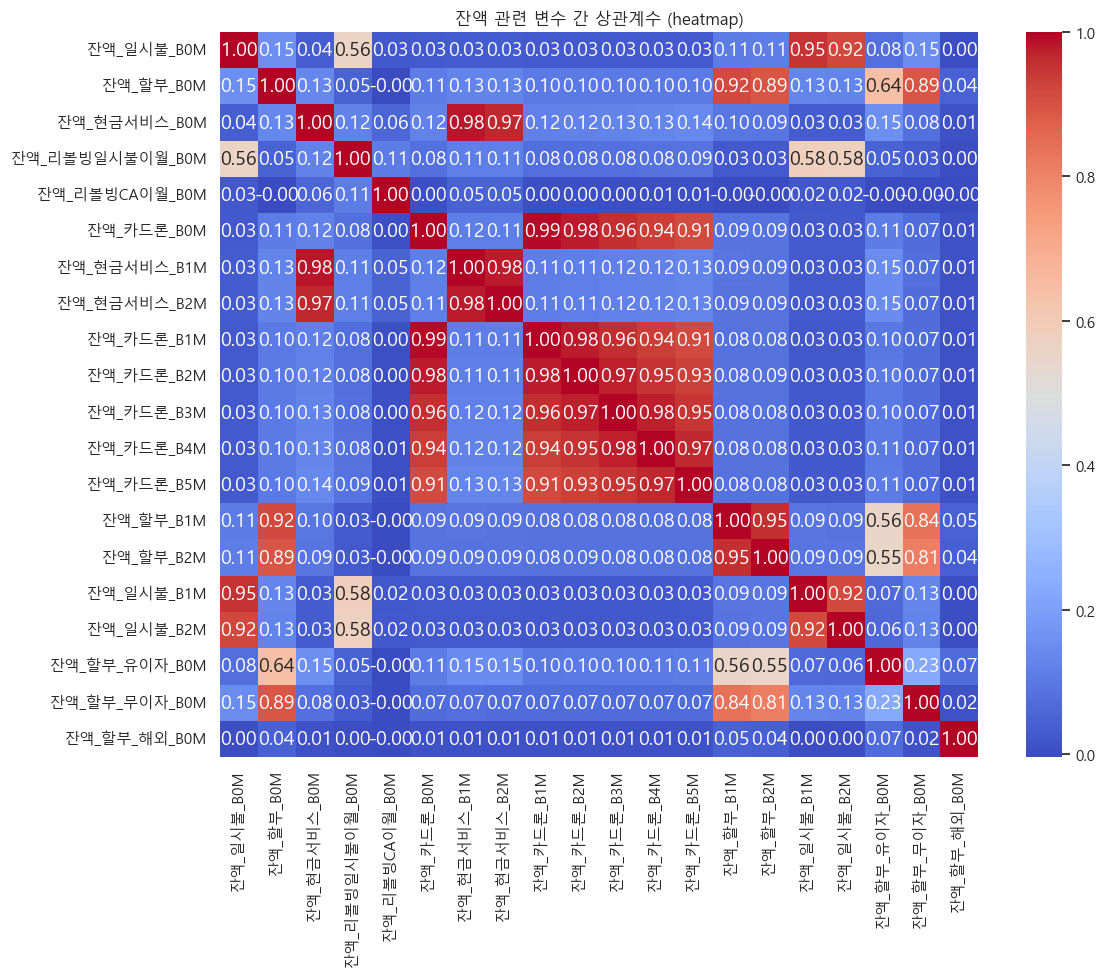

In [62]:
# '잔액'으로 시작하는 컬럼 추출
잔액_cols = [col for col in balance.columns if col.startswith('잔액')]
balance_잔액 = balance[잔액_cols]

# 상관계수 계산 및 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(balance_잔액.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('잔액 관련 변수 간 상관계수 (heatmap)')
plt.tight_layout()
plt.show()

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# '잔액'으로 시작하는 숫자형 컬럼 추출
잔액_cols = [col for col in balance.columns if col.startswith('잔액')]
잔액_df = balance[잔액_cols].select_dtypes(include='number').dropna()

# 상수항 추가
X = add_constant(잔액_df)

# VIF 계산
vif_result = pd.DataFrame()
vif_result['변수명'] = 잔액_df.columns
vif_result['VIF'] = [variance_inflation_factor(X.values, i+1) for i in range(len(잔액_df.columns))]

# VIF 높은 순으로 정렬
vif_result.sort_values(by='VIF', ascending=False, inplace=True)

# 결과 출력
print(vif_result)

                변수명             VIF
1         잔액_할부_B0M 337538445.99422
18    잔액_할부_무이자_B0M 210146009.74384
17    잔액_할부_유이자_B0M  71475056.88570
8        잔액_카드론_B1M       101.72117
5        잔액_카드론_B0M        95.42270
6      잔액_현금서비스_B1M        46.08601
9        잔액_카드론_B2M        39.35645
10       잔액_카드론_B3M        38.06198
11       잔액_카드론_B4M        33.61597
2      잔액_현금서비스_B0M        32.24919
7      잔액_현금서비스_B2M        22.88442
12       잔액_카드론_B5M        16.31237
13        잔액_할부_B1M        14.97126
0        잔액_일시불_B0M        12.45727
15       잔액_일시불_B1M        11.92337
14        잔액_할부_B2M        11.37755
16       잔액_일시불_B2M         7.48280
3   잔액_리볼빙일시불이월_B0M         1.60639
4    잔액_리볼빙CA이월_B0M         1.01772
19     잔액_할부_해외_B0M         1.00516


#### 잔액_할부

In [73]:
# 변수들 추출
a = balance['잔액_할부_B0M']
b = balance['잔액_할부_무이자_B0M']
c = balance['잔액_할부_유이자_B0M']

# 차이 계산
diff = a - (b + c)

# 정확히 같은 비율
exact_match_ratio = (diff == 0).mean()

# 결과 출력
print(f"정확히 일치하는 비율: {exact_match_ratio:.4f}")

정확히 일치하는 비율: 0.9570


In [75]:
balance['잔액_할부_최근3개월평균'] = balance[['잔액_할부_B0M', '잔액_할부_B1M', '잔액_할부_B2M']].mean(axis=1)
balance.drop(columns=['잔액_할부_B0M', '잔액_할부_B1M', '잔액_할부_B2M'], inplace=True)

- VIF가 가장 높은 잔액_할부_B0M은 무이자/유이자의 합으로(거의 일치) 중복된다.
- 무이자/유이자가 분석에 더 활용도가 높다고 생각하여 할부_B0M을 지우려고 시도.
- 하지만, B0M을 지우면 B1M, B2M만 남는게 애매하다고 판단
- B0M, B1M, B2M의 상관관계도 거의 비슷하게 나와서 잔액_할부_최근3개월평균 으로 파생변수를 만들고
- B0M, B1M, B2M 모두 삭제
- 누적인지 -> 하나만써도 될 것 같다, 따로따로인지 -> 지금 방법 오케이
- 각 독립적인 값으로 확인하여 이대로 진행

#### 잔액_카드론

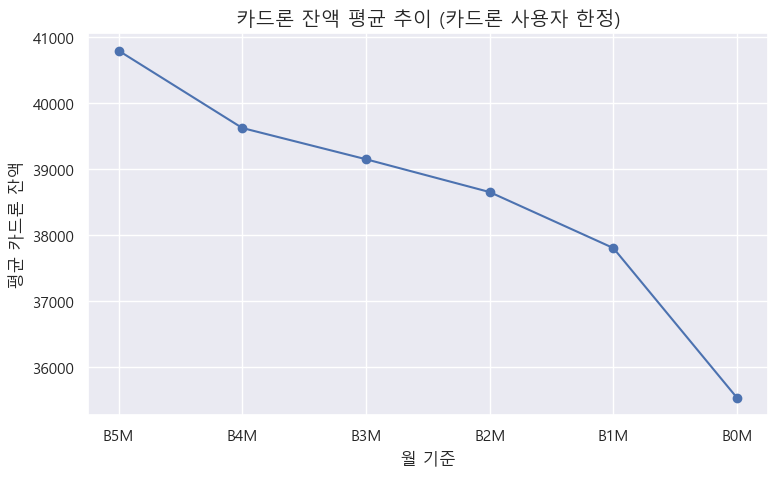

잔액_카드론_B5M   40794.18038
잔액_카드론_B4M   39622.25690
잔액_카드론_B3M   39148.85995
잔액_카드론_B2M   38651.59791
잔액_카드론_B1M   37803.23613
잔액_카드론_B0M   35533.98229
dtype: float64

변동률: 13.63015670647101


In [138]:
card_loan_cols = [
    '잔액_카드론_B5M', '잔액_카드론_B4M', '잔액_카드론_B3M',
    '잔액_카드론_B2M', '잔액_카드론_B1M', '잔액_카드론_B0M'
]

# 카드론 사용자만 추출 (6개월 중 1개라도 0 이상이면 포함)
card_loan_users = balance[(balance[card_loan_cols] > 0).any(axis=1)]

# 월별 평균값 다시 계산
monthly_mean_users = card_loan_users[card_loan_cols].mean()

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(['B5M', 'B4M', 'B3M', 'B2M', 'B1M', 'B0M'], monthly_mean_users, marker='o')
plt.title('카드론 잔액 평균 추이 (카드론 사용자 한정)', fontsize=14)
plt.xlabel('월 기준')
plt.ylabel('평균 카드론 잔액')
plt.grid(True)
plt.tight_layout()
plt.show()

# 추가 정보 출력
print(monthly_mean_users)
print("\n변동률:", ((monthly_mean_users.max() - monthly_mean_users.min()) / monthly_mean_users.mean()) * 100)

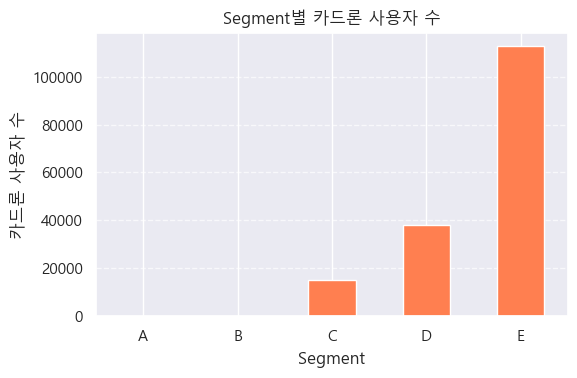

Segment
A        88
B        20
C     15309
D     38208
E    112633
Name: count, dtype: int64


In [142]:
# Segment별 카드론 사용자 수 세기
card_loan_user_counts_by_segment = card_loan_users['Segment'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(6, 4))
card_loan_user_counts_by_segment.plot(kind='bar', color='coral')
plt.title('Segment별 카드론 사용자 수')
plt.xlabel('Segment')
plt.ylabel('카드론 사용자 수')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(card_loan_user_counts_by_segment)

In [147]:
# 카드론 관련 컬럼명 목록
card_loan_cols = [
    '잔액_카드론_B5M', '잔액_카드론_B4M', '잔액_카드론_B3M',
    '잔액_카드론_B2M', '잔액_카드론_B1M', '잔액_카드론_B0M'
]

# 파생변수 생성 (6개월 평균)
balance['잔액_카드론_최근6개월평균'] = balance[card_loan_cols].mean(axis=1)

# 기존 컬럼 제거
balance.drop(columns=card_loan_cols, inplace=True)

- 선으로 봤을 때 차이가 조금은 있지만, 지금은 컬럼을 줄이는게 목표이기 때문에
- 평균을 몇개의 컬럼으로 할까 생각해보다, 그래도 6개의 컬럼을 쓰는게 정확성이 높을 것 같아서
- 잔액_카드론_최근6개월평균 으로 파생변수를 만들고, 나머지 삭제
- 나중에 자세히 다시 분석

#### 잔액_현금서비스

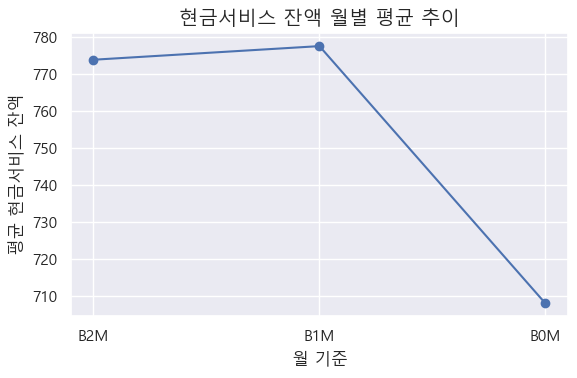

잔액_현금서비스_B2M   773.94766
잔액_현금서비스_B1M   777.63366
잔액_현금서비스_B0M   707.97172
dtype: float64


In [154]:
# 현금서비스 관련 컬럼
cash_cols = ['잔액_현금서비스_B2M', '잔액_현금서비스_B1M', '잔액_현금서비스_B0M']

# 각 월 기준 평균 계산
cash_means = balance[cash_cols].mean()

# 시각화
plt.figure(figsize=(6, 4))
plt.plot(['B2M', 'B1M', 'B0M'], cash_means, marker='o', linestyle='-')
plt.title('현금서비스 잔액 월별 평균 추이', fontsize=14)
plt.xlabel('월 기준')
plt.ylabel('평균 현금서비스 잔액')
plt.grid(True)
plt.tight_layout()
plt.show()

# 평균값 출력도 함께
print(cash_means)

In [192]:
# 파생변수 생성
balance['잔액_현금서비스_최근3개월평균'] = balance[cash_cols].mean(axis=1)

# 기존 컬럼 삭제
balance.drop(columns=cash_cols, inplace=True)

- 서로간 상관관계가 (1, 0.98, 0.97) 높다.
- 다중공선성도 높게 나타난다.
- 더 분석을 해봐야겠지만, 이것도 컬럼을 줄이기 위해
- 잔액_현금서비스_최근3개월평균 으로 파생 생성하고, 나머지 제거

In [194]:
# '잔액'으로 시작하는 숫자형 컬럼 추출
잔액_cols = [col for col in balance.columns if col.startswith('잔액')]
잔액_df = balance[잔액_cols].select_dtypes(include='number').dropna()

# 상수항 추가
X = add_constant(잔액_df)

# VIF 계산
vif_result = pd.DataFrame()
vif_result['변수명'] = 잔액_df.columns
vif_result['VIF'] = [variance_inflation_factor(X.values, i+1) for i in range(len(잔액_df.columns))]

# VIF 높은 순으로 정렬
vif_result.sort_values(by='VIF', ascending=False, inplace=True)

# 결과 출력
print(vif_result)

                 변수명      VIF
0         잔액_일시불_B0M 12.43653
3         잔액_일시불_B1M 11.91358
8      잔액_할부_최근3개월평균 10.07961
4         잔액_일시불_B2M  7.48036
6      잔액_할부_무이자_B0M  7.06706
5      잔액_할부_유이자_B0M  2.83170
1    잔액_리볼빙일시불이월_B0M  1.59979
10  잔액_현금서비스_최근3개월평균  1.05714
9     잔액_카드론_최근6개월평균  1.03192
2     잔액_리볼빙CA이월_B0M  1.01662
7       잔액_할부_해외_B0M  1.00484


### 월중평잔

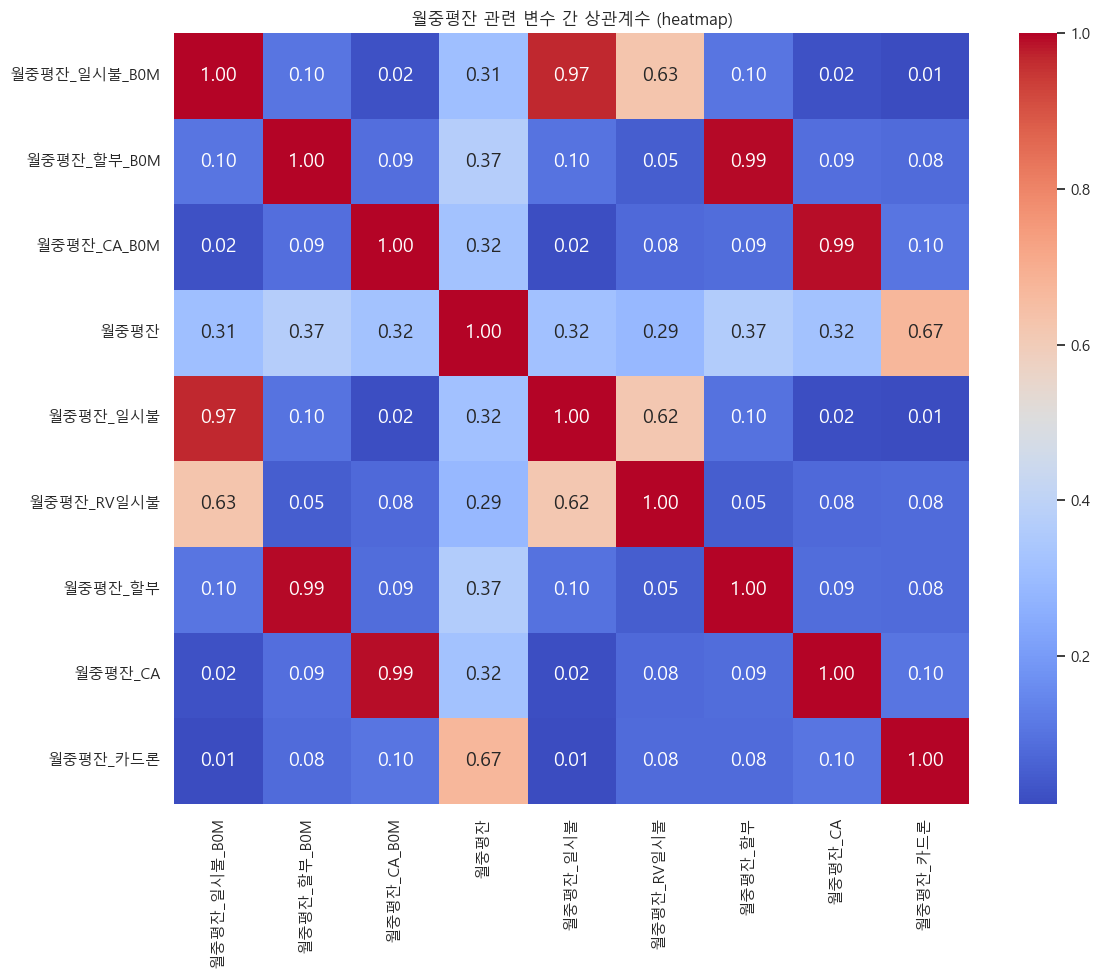

In [169]:
# '월중평잔'으로 시작하는 컬럼 추출
월중평잔_cols = [col for col in balance.columns if col.startswith('월중평잔')]
balance_월중평잔 = balance[월중평잔_cols]

# 상관계수 계산 및 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(balance_월중평잔.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('월중평잔 관련 변수 간 상관계수 (heatmap)')
plt.tight_layout()
plt.show()

In [172]:
# '잔액'으로 시작하는 숫자형 컬럼 추출
월중평잔_cols = [col for col in balance.columns if col.startswith('월중평잔')]
월중평잔_df = balance[월중평잔_cols].select_dtypes(include='number').dropna()

# 상수항 추가
X2 = add_constant(월중평잔_df)

# VIF 계산
vif_result2 = pd.DataFrame()
vif_result2['변수명'] = 월중평잔_df.columns
vif_result2['VIF'] = [variance_inflation_factor(X2.values, i+1) for i in range(len(월중평잔_df.columns))]

# VIF 높은 순으로 정렬
vif_result2.sort_values(by='VIF', ascending=False, inplace=True)

# 결과 출력
print(vif_result2)

            변수명      VIF
1   월중평잔_할부_B0M 79.85283
6       월중평잔_할부 79.31924
2   월중평잔_CA_B0M 53.82525
7       월중평잔_CA 53.68097
4      월중평잔_일시불 15.66165
0  월중평잔_일시불_B0M 15.52124
3          월중평잔  3.17353
8      월중평잔_카드론  2.24333
5    월중평잔_RV일시불  1.68968


In [196]:
# 두 컬럼이 완전히 같은 행은 제외하고, 값이 다른 행만 추출
diff_df = balance[balance['월중평잔_할부_B0M'] != balance['월중평잔_할부']][
    ['월중평잔_할부_B0M', '월중평잔_할부', 'Segment']
]

# 차이도 함께 보기
diff_df['차이'] = (diff_df['월중평잔_할부'] - diff_df['월중평잔_할부_B0M']).abs()

diff_df

,월중평잔_할부_B0M,월중평잔_할부,Segment,차이
0,547,532,D,15
1,2553,2639,E,86
2,8778,8903,C,125
3,5607,5598,D,9
6,2245,2304,E,59
...,...,...,...,...
2399979,12116,12808,D,692
2399985,5156,4999,E,157
2399987,5383,4782,C,601
2399997,3374,3297,C,77
